# Setup

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Creating the classes

### Data Explorer

In [3]:
class DataExplorer:
    @staticmethod
    def explore_data(data):
        print(data.head().T)
        print(data.describe())
        print(data.info())
    
    @staticmethod
    def plot_histograms(data):
        data.hist(bins=15, figsize=(30, 15))
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_correlation_matrix(data):
        df_numeric = data.select_dtypes(include='number')
        plt.figure(figsize=(12, 8))
        sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
        plt.tight_layout()
        plt.show()


### Turkish Music emotion Classification Model

In [10]:
class TurkishClassificationModel:
    def __init__(self, filepath):
        self.filepath = filepath
        self.model_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(solver='lbfgs',
                           C=0.2,
                           random_state=42))
        ])
        self.X_train, self.X_test, self.y_train, self.y_test = [None] * 4
        self.le = LabelEncoder()  # Initialize LabelEncoder


    def load_data(self):
        self.data = pd.read_csv(self.filepath)
        DataExplorer.explore_data(self.data)
        return self

    def preprocess_data(self):
        X = self.data.drop('Class', axis=1)
        y = self.data['Class']
        y_encoded = self.le.fit_transform(y)  # Encode labels
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
        return self
    
    def train_model(self):
        self.model_pipeline.fit(self.X_train, self.y_train)
        return self
    
    def evaluate_model(self):
        print("Model Evaluation: \n")
        y_pred = self.model_pipeline.predict(self.X_test)
        # Calculate accuracy
        accuracy = accuracy_score(self.y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")

        cm = confusion_matrix(self.y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(self.y_test))
        disp.plot(cmap='Blues')
        plt.show()
        
        report = classification_report(self.y_test, y_pred)
        print("Classification Report:")
        print(report)
        return self
    
    def cross_validate_model(self):
        scores = cross_val_score(self.model_pipeline, self.X_train, self.y_train, cv=5)
        print("Average Accuracy with CV:", np.mean(scores))
        return self


# Executing the code

                                                       0         1          2  \
Class                                              relax     relax      relax   
_RMSenergy_Mean                                    0.052     0.125      0.046   
_Lowenergy_Mean                                    0.591     0.439      0.639   
_Fluctuation_Mean                                  9.136      6.68     10.578   
_Tempo_Mean                                      130.043    142.24    188.154   
_MFCC_Mean_1                                       3.997     4.058      2.775   
_MFCC_Mean_2                                       0.363     0.516      0.903   
_MFCC_Mean_3                                       0.887     0.785      0.502   
_MFCC_Mean_4                                       0.078     0.397      0.329   
_MFCC_Mean_5                                       0.221     0.556      0.287   
_MFCC_Mean_6                                       0.118     0.799       0.14   
_MFCC_Mean_7                

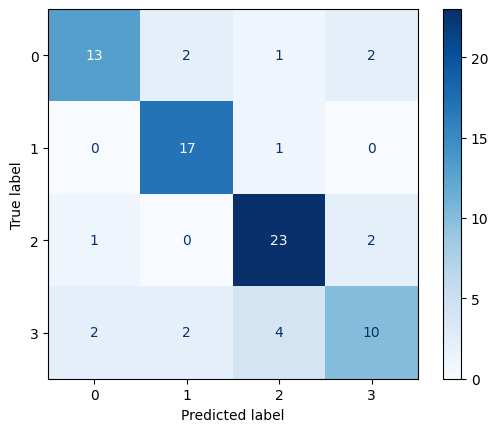

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76        18
           1       0.81      0.94      0.87        18
           2       0.79      0.88      0.84        26
           3       0.71      0.56      0.62        18

    accuracy                           0.79        80
   macro avg       0.78      0.78      0.77        80
weighted avg       0.78      0.79      0.78        80

Average Accuracy with CV: 0.78125


In [11]:
filepath=r'C:\Users\55144\OneDrive - ArcelorMittal\Documents\GitHub\mlops_team_20\notebooks\Data background\data\raw\Acoustic Features.csv'

model = TurkishClassificationModel(filepath)
model.load_data()
model.preprocess_data()
model.train_model()
model.evaluate_model()
model.cross_validate_model()